# Mesh

In [42]:
from adpy.fort63 import xr_loader


f63 = xr_loader("../data/fort.63.nc")

In [43]:
f63

<xarray.Dataset>
Dimensions:      (time: 1008, node: 31435, nele: 58369, nvertex: 3, mesh: 1,
                  nope: 1, neta: 103, nbou: 59, nvel: 4514)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 ...
    y            (node) float64 ...
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables:
    element      (nele, nvertex) int32 ...
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [44]:
f63.element

<xarray.DataArray 'element' (nele: 58369, nvertex: 3)>
[175107 values with dtype=int32]
Dimensions without coordinates: nele, nvertex
Attributes:
    long_name:    element
    cf_role:      face_node_connectivity
    start_index:  1
    units:        nondimensional

In [45]:
f63.element.values

array([[18760, 18493, 18761],
       [18760, 18495, 18493],
       [18761, 18493, 18494],
       ...,
       [19058, 19059, 19391],
       [19058, 18755, 19059],
       [19058, 18754, 18755]], dtype=int32)

In [46]:
f63.x.values

array([-94.42942 , -94.271163, -94.375835, ..., -63.546114, -63.541319,
       -63.471102])

In [47]:
f63.y.values

array([18.1369  , 18.173176, 18.230136, ..., 45.330561, 45.374727,
       45.365621])

In [48]:
from src.constants import NO_BBOX

In [49]:
xs = f63.x.values
ys = f63.y.values

ys_in = (NO_BBOX.lat[0] < ys) & (ys < NO_BBOX.lat[1])
print(ys_in)
xs_in = (NO_BBOX.lon[0] < xs) & (xs < NO_BBOX.lon[1])
both_in = xs_in & ys_in

[False False False ... False False False]


In [50]:
import numpy as np
np.any(both_in)

True

In [51]:
indices = np.where(both_in)[0]
new_indices = np.where(indices)[0]
neg_indices = np.where(~both_in)[0]

In [52]:
neg_set = set(neg_indices)

In [53]:
elements = f63.element.values - 1

In [54]:
elements.shape

(58369, 3)

In [55]:
# Create a boolean mask for rows to keep
mask = ~np.isin(elements, neg_indices).any(axis=1)

# Apply the mask to filter out bad rows
filtered_elements = elements[mask]

filtered_elements

array([[2669, 2678, 2839],
       [2670, 2840, 2672],
       [2520, 2518, 2674],
       ...,
       [6521, 6520, 6118],
       [6520, 6906, 6905],
       [6521, 6906, 6520]], dtype=int32)

In [56]:
new_xs = xs[indices]
new_ys = ys[indices]

In [57]:
mapping = dict(zip(indices, new_indices))

# Relabeling the filtered_elements
relabelled_elements = np.vectorize(mapping.get)(filtered_elements)

relabelled_elements

array([[  16,   25,   43],
       [  17,   44,   19],
       [   8,    6,   21],
       ...,
       [ 993,  992,  879],
       [ 992, 1091, 1090],
       [ 993, 1091,  992]])

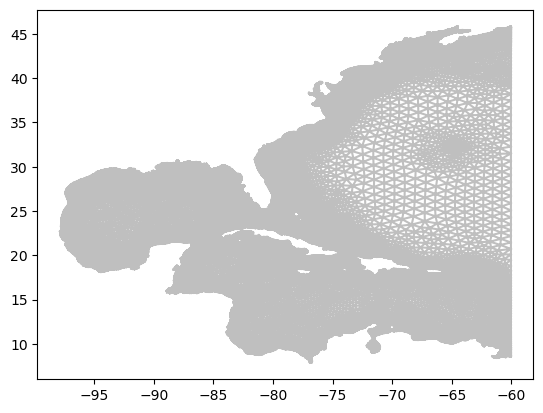

In [58]:
import matplotlib.pyplot as plt
plt.triplot(xs, ys, elements, color='0.75')

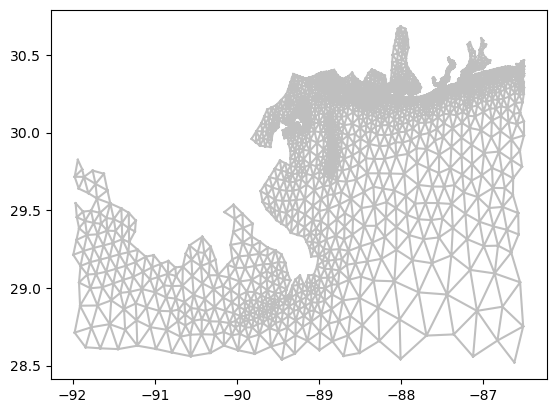

In [59]:
plt.triplot(new_xs, new_ys, relabelled_elements, color='0.75')

In [ ]:
def filter_mesh():
    f63 = xr_loader("../data/fort.63.nc")
    xs = f63.x.values
    ys = f63.y.values
    ys_in = (NO_BBOX.lat[0] < ys) & (ys < NO_BBOX.lat[1])
    xs_in = (NO_BBOX.lon[0] < xs) & (xs < NO_BBOX.lon[1])
    both_in = xs_in & ys_in
    indices = np.where(both_in)[0]
    new_indices = np.where(indices)[0]
    neg_indices = np.where(~both_in)[0]
    elements = f63.element.values - 1
    mask = ~np.isin(elements, neg_indices).any(axis=1)
    filtered_elements = elements[mask]
    mapping = dict(zip(indices, new_indices))
    relabelled_elements = np.vectorize(mapping.get)(filtered_elements)
    f63 = f63.isel(node=indices)
    